In [1]:
from matplotlib.pyplot import imshow
%matplotlib inline

import tensorflow as tf

import nn

nn.enable_debug_eager_mode()
tf.random.set_seed(42)

In [2]:
time_dim = nn.SpatialDim("time")
nn.FeatureDim("in", 5)

Dim{F'in'(5)}

In [3]:
import example_data.audio
raw_audio, out_raw_spatial_dim = example_data.audio.get_sample_batch()  # [B,samples]
raw_audio, out_raw_spatial_dim

Metal device set to: Apple M1 Pro
layer dummy_net/'constant': [B(2),T|'samples'[B(2)]] float32


2022-04-28 02:43:36.421912: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-28 02:43:36.422024: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<Tensor /'constant' [B(2),T|'samples'[B(2)]] <tf.Tensor: shape=(2, 228672), dtype=float32, numpy=
 array([[ 6.3299271e-04,  6.0508400e-04,  6.0202123e-04, ...,
         -6.1031205e-05, -4.4028056e-05, -7.4390686e-05],
        [-1.2478571e-03, -1.5889421e-03, -1.8114948e-03, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)> via 'constant'>,
 Dim{'samples'[B(2)]})

In [4]:
if False:  # optional
    import soundcard
    speaker = soundcard.default_speaker()

    speaker.play(raw_audio.data.placeholder.numpy()[0], 16_000)


layer dummy_net/'random': ['filter-dim0'(640),F'dummy'(1),F|F'channels'(50)] float32
layer dummy_net/'random_0': ['filter-dim0'(400),F'dummy'(1),F|F'dummy'(1)] float32
layer dummy_net/'slice': [B(2),T|'gammatone_v2:slice:out_dim'[B(2)]] float32
layer dummy_net/'slice_0': [B(2),T|'gammatone_v2:slice:out_dim'[B(2)]] float32
layer dummy_net/'sub': [B(2),T|'gammatone_v2:slice:out_dim'[B(2)]] float32
layer dummy_net/'split_dims': [B(2),T|'gammatone_v2:slice:out_dim'[B(2)],F|F'dummy'(1)] float32
setup_tf_thread_pools() not yet called (via func get_tf_list_local_devices), calling it now.
Setup TF inter and intra global thread pools, num_threads None, session opts {'log_device_placement': False, 'device_count': {'GPU': 0}}.
Device not set explicitly, and we found a GPU, which we will use.


2022-04-28 02:43:36.795217: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-28 02:43:36.795243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


layer dummy_net/'conv': [B(2),F|F'channels'(50),T|'gammatone_v2/gammatone_filterbank:out-spatial-dim0'[?]] float32
layer dummy_net/'output': [B(2),F|F'channels'(50),T|'gammatone_v2/gammatone_filterbank:out-spatial-dim0'[B(2)]] float32
layer dummy_net/'abs': [B(2),F|F'channels'(50),T|'gammatone_v2/gammatone_filterbank:out-spatial-dim0'[B(2)]] float32
layer dummy_net/'split_dims_0': [B(2),'channels'(50),F|F'dummy'(1),T|'gammatone_v2/gammatone_filterbank:out-spatial-dim0'[B(2)]] float32
Device not set explicitly, and we found a GPU, which we will use.
layer dummy_net/'conv': [B(2),'channels'(50),F|F'dummy'(1),T|'gammatone_v2/temporal_integration:out-spatial-dim0'[?]] float32
layer dummy_net/'output': [B(2),'channels'(50),F|F'dummy'(1),T|'gammatone_v2/temporal_integration:out-spatial-dim0'[B(2)]] float32
layer dummy_net/'squeeze': [B(2),F|'channels'(50),T|'gammatone_v2/temporal_integration:out-spatial-dim0'[B(2)]] float32
layer dummy_net/'constant': [] float32
layer dummy_net/'add': [B(2),

(<Tensor /'mul' [B(2),T|'gammatone_v2/temporal_integration:out-spatial-dim0'[B(2)],F|'channels'(50)] <tf.Tensor: shape=(2, 1423, 50), dtype=float32, numpy=
 array([[[-2.2974863e+00, -4.5062630e-03,  5.5243063e-01, ...,
           3.8304108e-01, -1.3135027e-02, -2.0207363e-01],
         [-2.2137980e+00,  1.8919568e-03,  2.2258589e-01, ...,
           6.5173119e-01,  2.6870233e-01,  8.2396066e-01],
         [-2.1798155e+00, -1.8861458e-02,  3.0024460e-01, ...,
          -2.0659535e-01, -9.9955487e-01,  3.0070800e-01],
         ...,
         [-2.3293188e+00,  1.0123363e-01,  5.0874090e-01, ...,
          -5.9646356e-01, -1.0490212e+00, -8.4686172e-01],
         [-2.3903205e+00, -7.3580742e-02,  4.9091548e-01, ...,
          -3.4988987e-01, -6.8890226e-01,  2.2177064e-01],
         [-2.4492350e+00, -1.1100784e-01,  5.2351469e-01, ...,
           1.0734248e+00,  1.0920641e+00, -4.0072188e-01]],
 
        [[-2.0438497e+00,  1.6412225e-01, -2.9460454e-02, ...,
           4.6779165e-01, -2.467

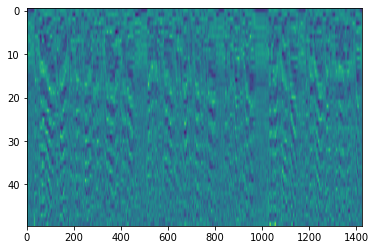

In [5]:
import asr.gt
audio, out_spatial_dim = asr.gt.GammatoneV2()(raw_audio, in_spatial_dim=out_raw_spatial_dim)
mean, var = nn.moments(audio, axis=out_spatial_dim)
audio = (audio - mean) * nn.rsqrt(var)
# audio = nn.BatchNorm(use_mask=True)(audio)
audio, out_spatial_dim, audio.data.placeholder, imshow(audio.data.placeholder.numpy()[0].transpose(), aspect="auto")

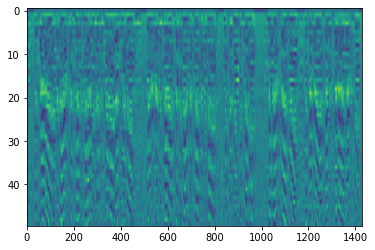

In [6]:
sample_rate = 16_000
stfts = tf.signal.stft(
    raw_audio.data.placeholder, frame_length=int(0.025 * sample_rate), frame_step=int(0.01 * sample_rate))
spectrograms = tf.abs(stfts) ** 2.

num_spectrogram_bins = stfts.shape[-1].value
lower_edge_hertz, upper_edge_hertz, num_mel_bins = 0.0, sample_rate / 2, 128
linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
  num_mel_bins, num_spectrogram_bins, sample_rate, lower_edge_hertz, upper_edge_hertz)
mel_spectrograms = tf.tensordot(spectrograms, linear_to_mel_weight_matrix, 1)
mel_spectrograms.set_shape(spectrograms.shape[:-1].concatenate(
  linear_to_mel_weight_matrix.shape[-1:]))

# Compute a stabilized log to get log-magnitude mel-scale spectrograms.
log_mel_spectrograms = tf.math.log(mel_spectrograms + 1e-6)

# Compute MFCCs from log_mel_spectrograms and take the first num_mel_bins.
mfccs = tf.signal.mfccs_from_log_mel_spectrograms(log_mel_spectrograms)[..., :50]

mfccs = tf.math.l2_normalize(mfccs, axis=1)

imshow(mfccs.numpy()[0].transpose(), aspect="auto")

layer dummy_net/'specaugment': [B(2),T|'gammatone_v2/temporal_integration:out-spatial-dim0'[B(2)],F|'channels'(50)] float32


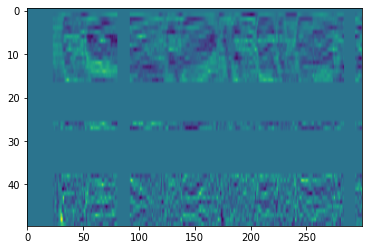

In [7]:
from asr.specaugment import specaugment_v1
masked = specaugment_v1(audio, global_train_step_dependent=False)
imshow(masked.data.placeholder.numpy()[0][:300].transpose(), aspect="auto")